In [306]:
#Import all neccessary libaries

from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

In [155]:
#Indicating the london property data list to append later on

LondonPropertyData = []

#I have multiple pages to scrape so looping the URL by keeping the "page number" as string (my unfixed variable)
for i in range(1,102):
    url = 'https://search.savills.com/hk/en/list?SearchList=Id_37507+Category_RegionCountyCountry&Tenure=GRS_T_B&SortOrder=SO_PCDD&Currency=HKD&Bedrooms=-1&Bathrooms=GRS_BT_1&Receptions=GRS_REC_1&ResidentialSizeUnit=SquareFeet&LandAreaUnit=Acre&SaleableAreaUnit=SquareFeet&AvailableSizeUnit=SquareFeet&Category=GRS_CAT_RES&Shapes=W10&CurrentPage='+str(i)
    response = requests.get(url) #This helps me check if the URL is scrapable or not, shows 200 so its ok to scrape
    response = response.content
    soup = BeautifulSoup(response, 'html.parser') #Telling my machine that i'm going to parse the HTML codes frm the website
    lists = soup.find_all('div', class_= 'sv-summary-results') #Identifying the parent block to scrape
    
    #Identifying the sub-parent contents inside the parent block to scrape
    for list in lists: 
        #Propertname,feature1, feature2-The last bits of property name had ".." so using the "[-1]" to remove it from backward
        #Price,size,bedroom,bathroom,livingroom- Had to clean the unwanted items/ words 
        propertyname = list.find('span', class_='sv-details__address1--truncate').text[:-1]
        price = list.find('span', class_='sv-property-price__original').text.replace('\xa0-\u200b', ' to').replace('(','').replace(')','').replace('HK$','').replace(",","")
        apttype = list.find('span', class_='sv-property-attribute__value').text
        size = list.find('div', class_='sv-property-price__size').text.replace('sq ft','')
        address = list.find('p', class_='sv-details__address2').text
        bedroom = list.find('div', class_='sv-property-attribute sv--bedrooms').text.replace('Bedrooms', '')
        bathroom = list.find('div', class_='sv-property-attribute sv--bathrooms').text.replace('Bathrooms', '')
        livingroom = list.find('div', class_='sv-property-attribute sv--receptions').text.replace('Receptions', '')
        feature1 = list.find('span', class_='sv-view-lt-med').text[:-1]
        feature2 = list.find('span', class_='sv-view-gt-med').text[:-1]
        LondonPropertyData.append([propertyname,price,apttype,size,address,bedroom,bathroom,livingroom,feature1,feature2])

#Printing out the Dataframe for my London property dataset
#Dropping the index column in the dataframe
df = pd.DataFrame(LondonPropertyData, columns = ['Property Name', 'Price (HKD)', 'Type', 'Size (sq ft)', 'Address', 'Bedroom(s)', 'Bathroom(s)', 'Living room(s)', 'Feature 1', 'Feature 2'])
df.to_csv('London Property Data v5.csv', index=False)

In [212]:
df2 = pd.read_csv(r'C:\Users\user\London Property Data v5.csv')
df2

,Property Name,Price (HKD),Price (HKD in Millions),Type,Size (sq ft),Address,Bedroom(s),Bathroom(s),Living room(s),Feature 1,Feature 2
0,Elm Tree Road,110747664.0,110.7,House,"5,220","St. John's Wood, London, NW8 9JX",5,6,4,Property with planning consent to extend the p...,Property with planning consent to extend the p...
1,Cottrill Gardens,5075935.0,5.1,House,758,"Marcon Place, London, E8 1NY",3,2,1,Three bedrooms,Three bedrooms
2,Cumberland Close,7844626.0,7.8,House,"1,229","Wimbledon, London, SW20 8AT",4,2,1,In need of modernisation,In need of modernisation
3,Arundel Drive,8767523.0,8.8,House,"1,651","Woodford Green, Essex, IG8 9BZ",4,2,2,0.7 miles from Woodford Station (Central Line),0.7 miles from Woodford Station (Central Line)
4,Radnor Mews,15227804.0,15.2,House,"1,105","Connaught Village, London, W2 2SA",3,2,2,3 bedrooms,3 bedrooms
...,...,...,...,...,...,...,...,...,...,...,...
96,Wilton Street,82599299.0,82.6,House,"2,942","London, SW1X 7AQ",4,4,2,"Low built ""bookend"" house","Low built ""bookend"" house"
97,Colindale Gardens,5191296.5,5.2,New development,808 to 842,"Colindale Avenue, London, NW9 5HU",4,2,2,Help to Buy Available,Help to Buy Available
98,Greville House,22610981.0,22.6,Flat / Apartment,903,"Kinnerton Street, London, SW1X 8EY",2,2,1,Open-plan reception room/kitchen,Open-plan reception room/kitchen
99,Heathview Gardens,79830608.0,79.8,House,"8,584","Putney, London, SW15 3SZ",9,6,5,Country house feel and seclusion,Country house feel and seclusion


In [204]:
df2.describe().drop(columns = 'Price (HKD)').round(1)

,Price (HKD in Millions),Bedroom(s),Bathroom(s),Living room(s)
count,101.0,101.0,101.0,101.0
mean,29.1,3.0,2.3,1.6
std,54.1,1.8,1.4,1.0
min,3.5,1.0,1.0,1.0
25%,7.2,2.0,1.0,1.0
50%,11.5,3.0,2.0,1.0
75%,20.8,4.0,3.0,2.0
max,364.5,12.0,9.0,5.0


In [231]:
df2.median().round(1).reset_index()

C:\Users\user\AppData\Local\Temp\ipykernel_88076\1363055559.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2.median().round(1).reset_index()


,index,0
0,Price (HKD),11536215.0
1,Price (HKD in Millions),11.5
2,Bedroom(s),3.0
3,Bathroom(s),2.0
4,Living room(s),1.0


In [272]:
#Checking the property type distribution via table 

pd.value_counts(df2['Type'].values).reset_index()

,index,0
0,Flat / Apartment,43
1,House,31
2,New development,20
3,Penthouse,7


<AxesSubplot:title={'center':'Distribution of House Types in London'}, ylabel='Spilt'>

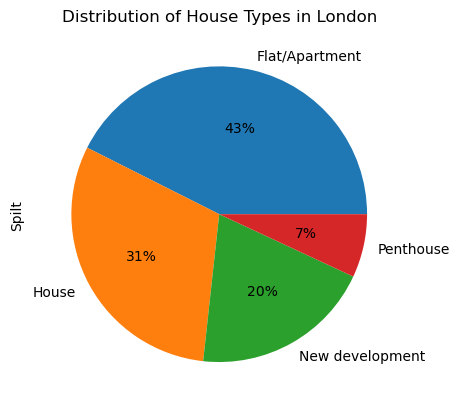

In [293]:
#Checking the property type distribution via piechart 

TypePieChart = {'Type':['Flat/Apartment', 'House','New development','Penthouse'], 'Spilt':[43,31,20,7]}
df3 = pd.DataFrame(data=TypePieChart)
my_labels=['Flat/Apartment', 'House','New development','Penthouse']
df3.plot.pie(title="Distribution of House Types in London",y='Spilt',autopct='%1.0f%%', labels=my_labels, legend=False)

In [245]:
df2.groupby('Type')['Price (HKD in Millions)'].describe().round(1).reset_index()

,Type,count,mean,std,min,25%,50%,75%,max
0,Flat / Apartment,43.0,11.6,8.9,3.5,5.8,8.3,13.4,48.9
1,House,31.0,52.8,77.8,5.1,10.6,19.8,81.2,364.5
2,New development,20.0,27.4,60.5,3.7,6.0,7.6,11.8,267.4
3,Penthouse,7.0,36.7,33.4,8.3,17.6,18.5,47.0,101.1


In [297]:
df2.groupby('Type')['Price (HKD in Millions)'].agg('median').reset_index()

,Type,Price (HKD in Millions)
0,Flat / Apartment,8.30
1,House,19.80
2,New development,7.55
3,Penthouse,18.50


In [252]:
df2.groupby('Type')['Bedroom(s)'].describe().round(1).reset_index()

,Type,count,mean,std,min,25%,50%,75%,max
0,Flat / Apartment,43.0,2.2,0.8,1.0,2.0,2.0,3.0,4.0
1,House,31.0,4.4,1.7,3.0,3.0,4.0,5.0,10.0
2,New development,20.0,3.0,2.4,1.0,2.0,2.0,3.2,12.0
3,Penthouse,7.0,2.7,1.4,1.0,2.0,2.0,3.5,5.0


In [249]:
df2.groupby('Bedroom(s)')['Price (HKD in Millions)'].describe().round(1).reset_index()

,Bedroom(s),count,mean,std,min,25%,50%,75%,max
0,1,14.0,9.5,11.7,3.5,4.6,5.5,7.8,48.3
1,2,30.0,9.7,4.6,3.8,6.6,8.6,11.9,22.6
2,3,27.0,27.1,51.1,5.1,7.6,12.8,21.6,267.4
3,4,16.0,29.2,35.1,5.2,8.7,16.4,28.1,133.8
4,5,9.0,62.2,73.5,12.3,19.8,23.1,101.1,230.7
5,6,1.0,91.8,NaN,91.8,91.8,91.8,91.8,91.8
6,7,1.0,128.7,NaN,128.7,128.7,128.7,128.7,128.7
7,9,1.0,79.8,NaN,79.8,79.8,79.8,79.8,79.8
8,10,1.0,364.5,NaN,364.5,364.5,364.5,364.5,364.5
9,12,1.0,96.9,NaN,96.9,96.9,96.9,96.9,96.9


In [248]:
df2.groupby('Bedroom(s)')['Price (HKD in Millions)'].agg('median').reset_index()

,Bedroom(s),Price (HKD in Millions)
0,1,5.50
1,2,8.65
2,3,12.80
3,4,16.40
4,5,23.10
5,6,91.80
6,7,128.70
7,9,79.80
8,10,364.50
9,12,96.90


In [305]:
df2.groupby(['Type','Bedroom(s)']).agg('median').reset_index().drop(columns = 'Price (HKD)').drop(columns = 'Bathroom(s)').drop(columns = 'Living room(s)')

,Type,Bedroom(s),Price (HKD in Millions)
0,Flat / Apartment,1,4.60
1,Flat / Apartment,2,8.65
2,Flat / Apartment,3,14.05
3,Flat / Apartment,4,19.60
4,House,3,10.60
5,House,4,18.25
6,House,5,23.10
7,House,6,91.80
8,House,7,128.70
9,House,9,79.80
